# Averaged Artifact Substraction with EEG Data
## First step prepare Jupyter Notebook

In [1]:
import os,sys
from FACET.Facet import Facet

from loguru import logger
os.getcwd()
os.chdir(os.path.dirname(os.path.abspath("__file__")))


#configure logging
logger.remove()
logger.add(sys.stderr, level="INFO")
logger.add("Facet.log", level="DEBUG")

eegDataSet = "F:\EEG Datasets\openneuro\FMRIWITHMOTION"
#eegDataSet = "C:\\Users\\janik\\Downloads\\FMRIB_Data.set\\eegNiazy.edf"

f = Facet()


## Second Step import EEG Data

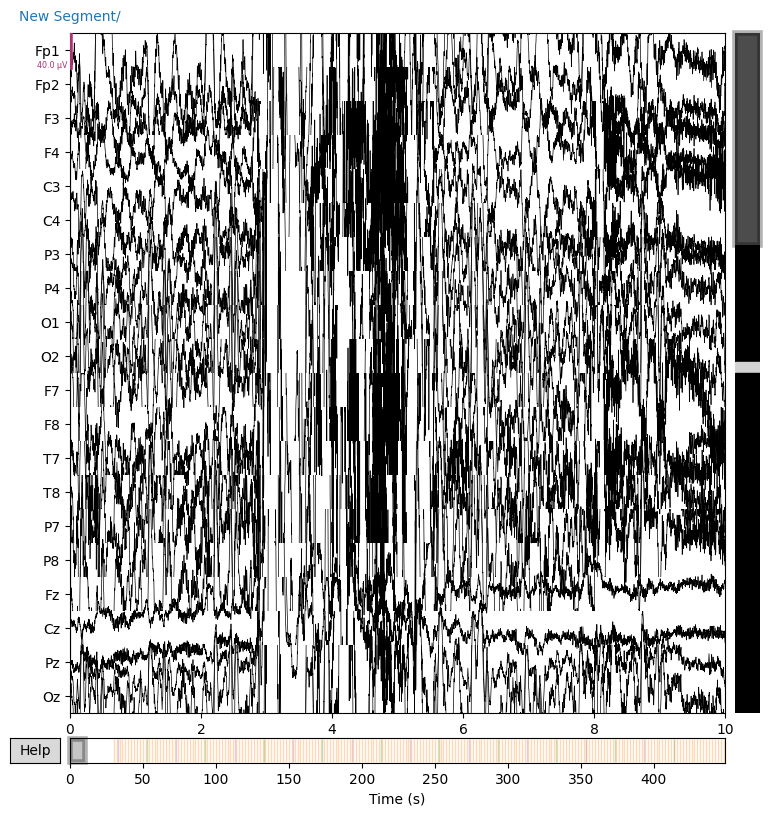

In [2]:
f.import_from_bids(bids_path=eegDataSet,rel_trig_pos=-5.9,upsampling_factor=1, bads=['EMG', 'ECG'], subject="xp101", session=None,task="eegfmriNF")
eeg = f.get_EEG()
#print channels
logger.debug(eeg["raw"].ch_names)

f.plot_EEG(title="after import")

## Third Step Preprocessing

In [3]:
f.pre_processing()


2024-03-07 13:40:39.543 | INFO     | FACET.Frameworks.Correction:upsample:380 - Upsampling Data


## Fourth Step find triggers

In [4]:
eeg = f.get_EEG()
#print events
f.find_triggers(r'\bResponse\b') # Using Niazys data
eeg = f.get_EEG()
#print triggers
logger.debug(eeg["triggers"])
#f.cut()

#f.find_triggers(r'.*TR.*') # Using Fischmeisters data

2024-03-07 13:40:41.372 | INFO     | FACET.Facet:find_triggers:28 - finding triggers
2024-03-07 13:40:42.465 | INFO     | FACET.Facet:find_triggers:31 - Found 210 triggers


## Fourth step apply AAS

In [5]:
f.apply_Moosmann(file_path="headmotiondata_209s.tsv", threshold=0.8)

2024-03-07 13:40:42.479 | INFO     | FACET.Facet:apply_Moosmann:42 - Applying Moosmann with headmotiondata_209s.tsv


## Fifth step Remove Artifacts

In [6]:
f.remove_artifacts( )
eeg = f.get_EEG()
#print triggers
logger.debug(eeg["triggers"])



## Sixth step Post-Processing

2024-03-07 13:40:45.496 | INFO     | FACET.Frameworks.Correction:downsample:369 - Downsampling Data


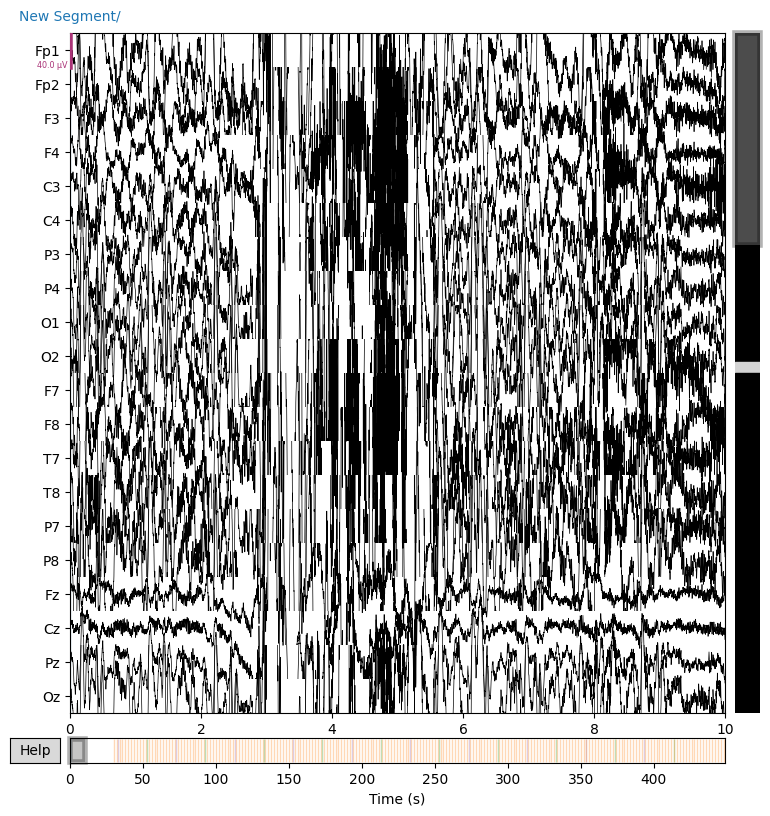

In [7]:
f.downsample()
f.plot_EEG( title="after downsampling")
f.lowpass(40)

## Seventh display the processed eeg data

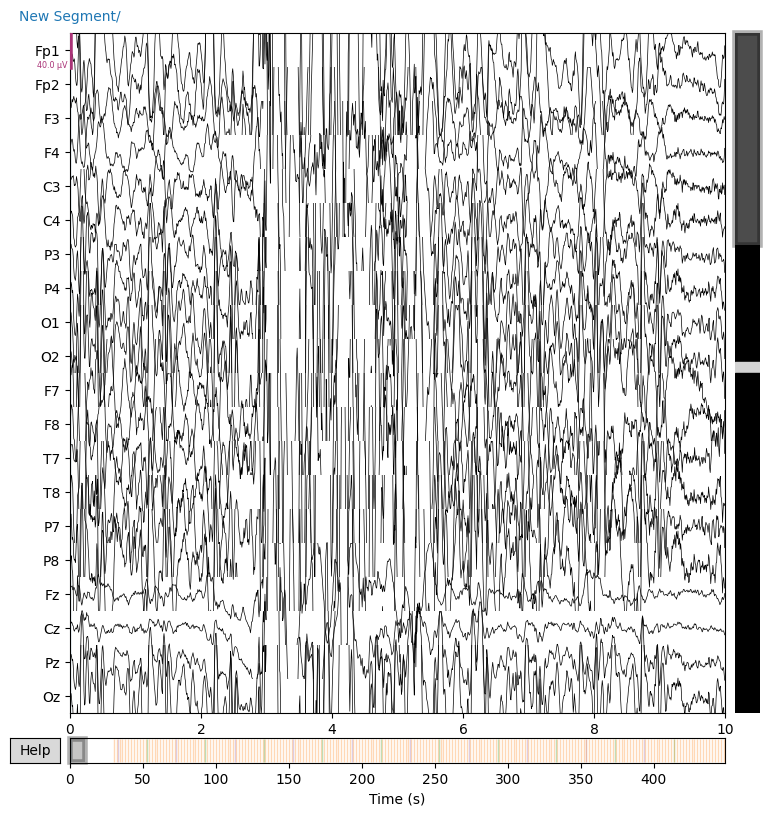

In [8]:
f.plot_EEG(title="after lowpass")
#f.export_EEG("Moosmann_cleaned.edf")

## Eighth Evaluate Results

2024-03-07 13:40:52.965 | INFO     | FACET.Facet:find_triggers:28 - finding triggers
2024-03-07 13:40:53.914 | INFO     | FACET.Facet:find_triggers:31 - Found 210 triggers
2024-03-07 13:40:54.207 | INFO     | FACET.Frameworks.Evaluation:add_to_evaluate:31 - ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']


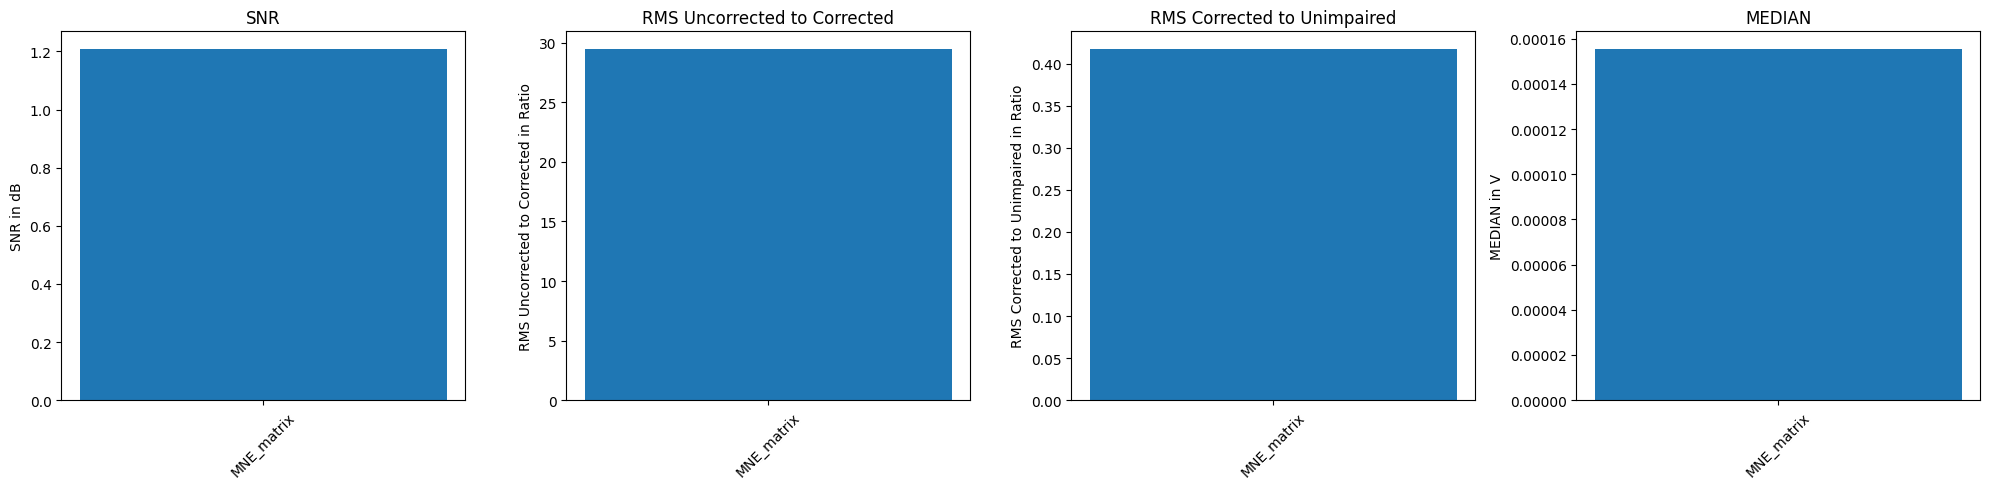

2024-03-07 13:41:08.935 | INFO     | __main__:<module>:8 - [{'Measure': 'SNR', 'Values': [1.208791505060526], 'Unit': 'dB'}, {'Measure': 'RMS Uncorrected to Corrected', 'Values': [29.485784442262922], 'Unit': 'Ratio'}, {'Measure': 'RMS Corrected to Unimpaired', 'Values': [0.4175046082001211], 'Unit': 'Ratio'}, {'Measure': 'MEDIAN', 'Values': [0.0001555327762942859], 'Unit': 'V'}]


In [9]:
f.find_triggers(r'\bResponse\b') # Using Niazys data
eeg_python = f.get_eeg()
f.add_to_evaluate(eeg_python, name="Moosmann") # Matrix will result in >1.0 RMS2 because of python mne inaccuracies



results = f.evaluate(plot=True,measures=["SNR", "RMS", "RMS2", "MEDIAN"])
logger.info(results)

